In [2]:
install.packages("igraph")
install.packages("Matrix")
install.packages("pracma")

library('igraph')
library('Matrix')
library('pracma')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




In [21]:
install.packages("resample")
library("resample")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##2. Random walk on networks with fat-tailed degree distribution

###2.2(a)Generate an undirected preferential attachment network with 900 nodes, where each new node attaches to m = 1 old nodes.

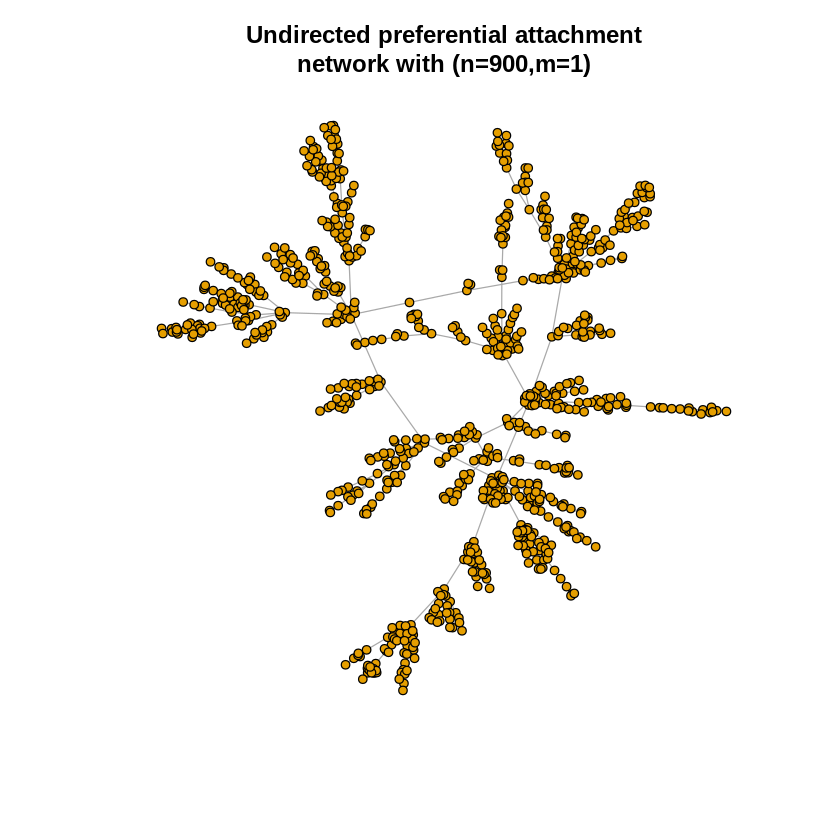

In [46]:
n1 <- 900
m1 <- 1
set.seed(0)
g1 <- barabasi.game(n=n1, m=m1, directed = F)
plot(g1, vertex.size=3, vertex.label=NA, main="Undirected preferential attachment
network with (n=900,m=1)")

###2.2(b) Let a random walker start from a randomly selected node. Measure and plot ⟨s(t)⟩ v.s. t and σ2(t) v.s. t.

In [60]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
    end_nodes = numeric(length=num_steps) 
    v = start_node
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF) 
        end_nodes[i] = v       
    }
    
    return(end_nodes)
}

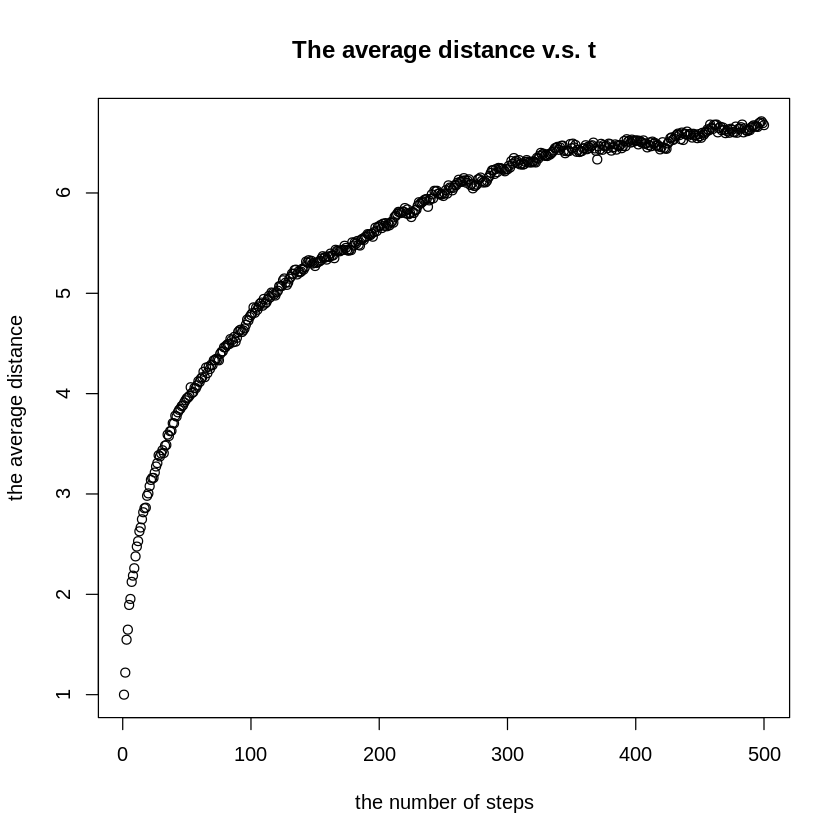

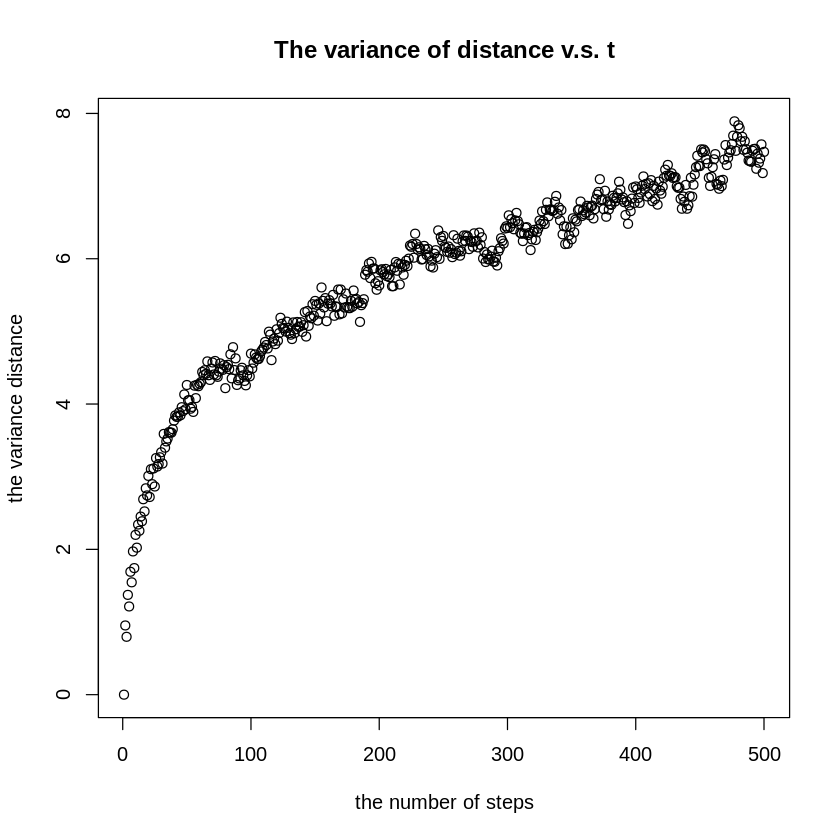

In [67]:
set.seed(1)
tstep <- 500
iterations <- 1000
s = matrix(data=NA, nrow=iterations, ncol=tstep)
last_degree = array(data=NA, dim=iterations)
for(i in 1:iterations){
  # find the GCC to guarantee the walk can happen
  if(is_connected(g1)) gcc = g1
  else
  {
    # obtain the community number and community size for each community
    cluster_components = clusters(g1)

    # obtain the max community size among all community 
    max_size = which.max(cluster_components$csize)

    # obtain the giant connected component (GCC)
    gcc = induced.subgraph(g1, which(cluster_components$membership == max_size))
  }

  start_node = sample(1:vcount(gcc),1)
  
  last_node = random_walk(gcc, tstep, start_node, tm)
  s[i,] = shortest.paths(gcc, last_node, start_node)
  last_degree[i] = degree(gcc, last_node[tstep])
}
# s_mean <- colMeans(s)
# s_var <- colVars(s)

plot(seq(1,tstep,1), colMeans(s), xlab="the number of steps", ylab="the average distance",main="The average distance v.s. t")
plot(seq(1,tstep,1), colVars(s), xlab="the number of steps", ylab="the variance distance",main="The variance of distance v.s. t")



###2.2(c) Measure the degree distribution of the nodes reached at the end of the random walk on this network. How does it compare with the degree distribution of the graph?

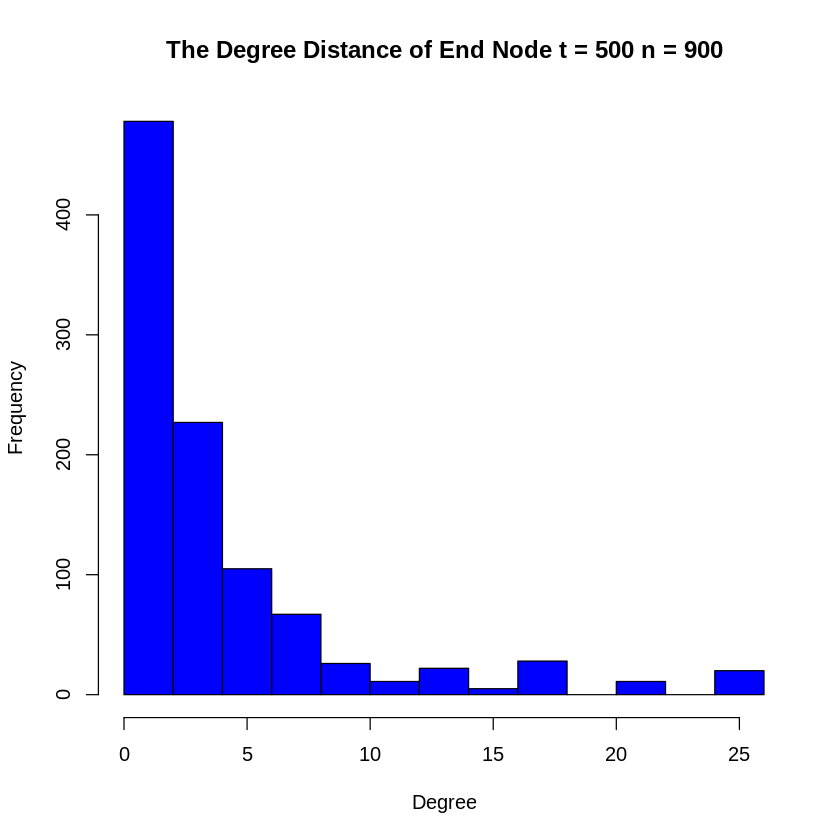

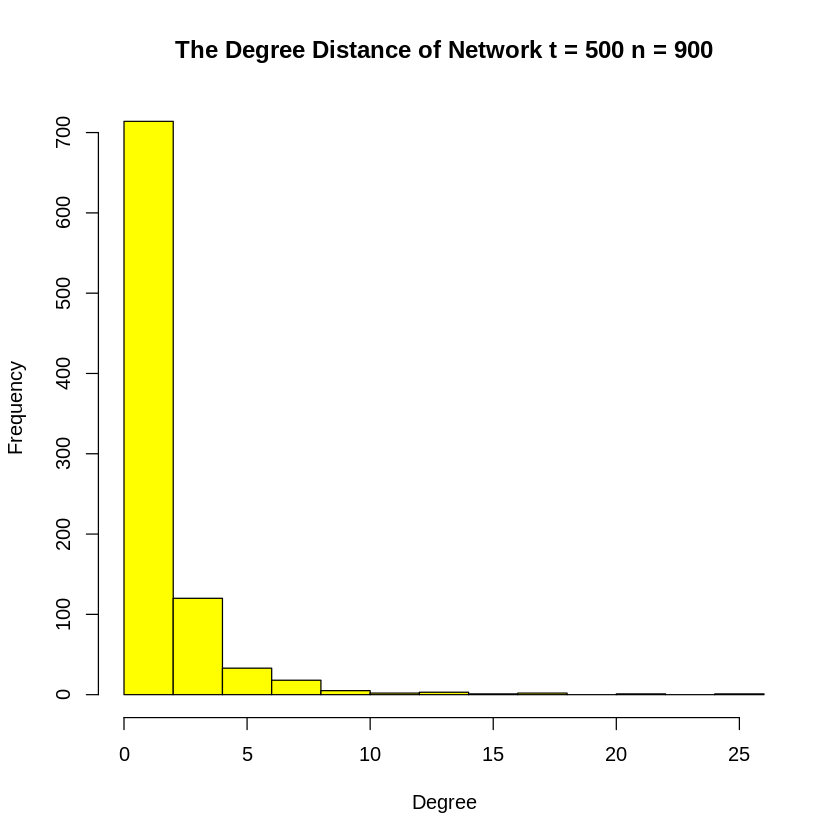

In [68]:
# plot the degree of the end node of random walk
hist(last_degree, col = 'blue', main=sprintf("The Degree Distance of End Node t = %d n = %d", tstep, n1), xlab = 'Degree', ylab = 'Frequency')

# plot the degree of the end node of random walk
hist(degree(gcc), col = 'yellow', main=sprintf("The Degree Distance of Network t = %d n = %d", tstep, n1), xlab = 'Degree', ylab = 'Frequency')


###2.2(d) Repeat 2(b) for preferential attachment networks with 90 and 9000 nodes, and m = 1. Compare the results and explain qualitatively. Does the diameter of the network play a role?

In [76]:
plot_meanvar_distance = function(g, tstep=100, iterations=1000){
  set.seed(1)
  s = matrix(data=NA, nrow=iterations, ncol=tstep)
  last_degree = array(data=NA, dim=iterations)
  for(i in 1:iterations){
    # find the GCC to guarantee the walk can happen
    if(is_connected(g)) gcc = g
    else
    {
      # obtain the community number and community size for each community
      cluster_components = clusters(g)

      # obtain the max community size among all community 
      max_size = which.max(cluster_components$csize)

      # obtain the giant connected component (GCC)
      gcc = induced.subgraph(g, which(cluster_components$membership == max_size))
    }

    start_node = sample(1:vcount(gcc),1)
    
    last_node = random_walk(gcc, tstep, start_node)
    s[i,] = shortest.paths(gcc, last_node, start_node)
    last_degree[i] = degree(gcc, last_node[tstep])
  }

  plot(seq(1,tstep,1), colMeans(s), xlab="the number of steps", ylab="the average distance",main="The average distance v.s. t")
  plot(seq(1,tstep,1), colVars(s), xlab="the number of steps", ylab="the variance distance",main="The variance of distance v.s. t")
  return(last_degree)
}

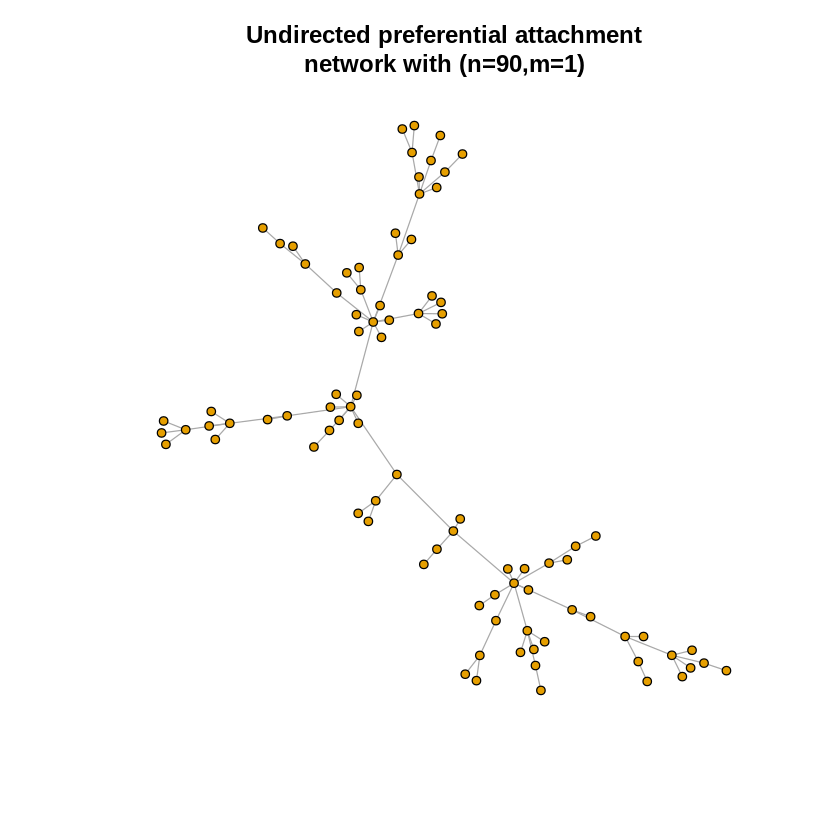

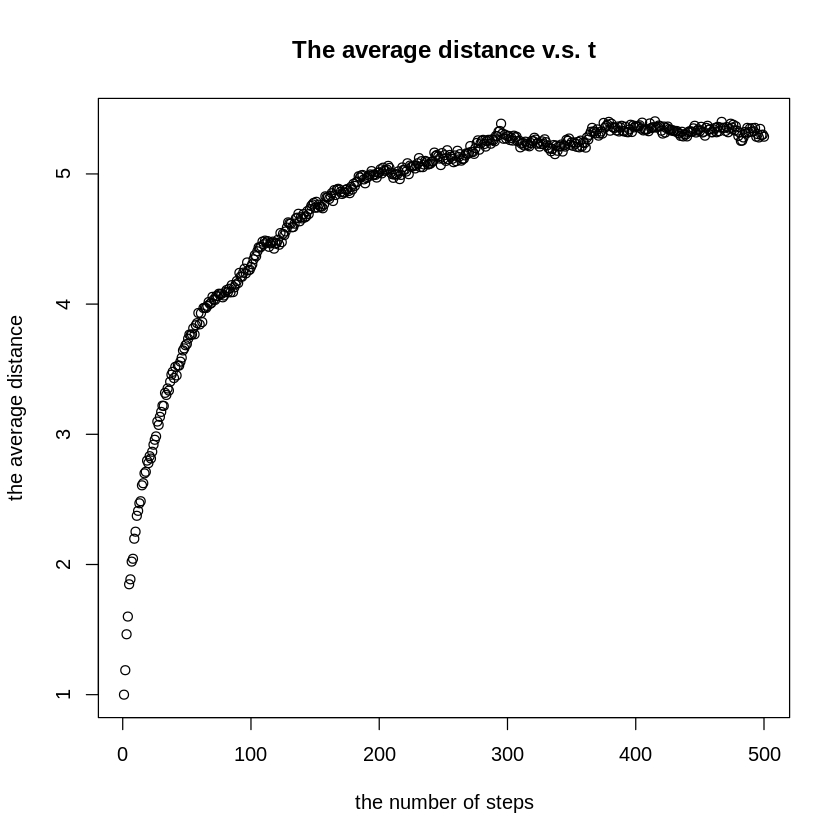

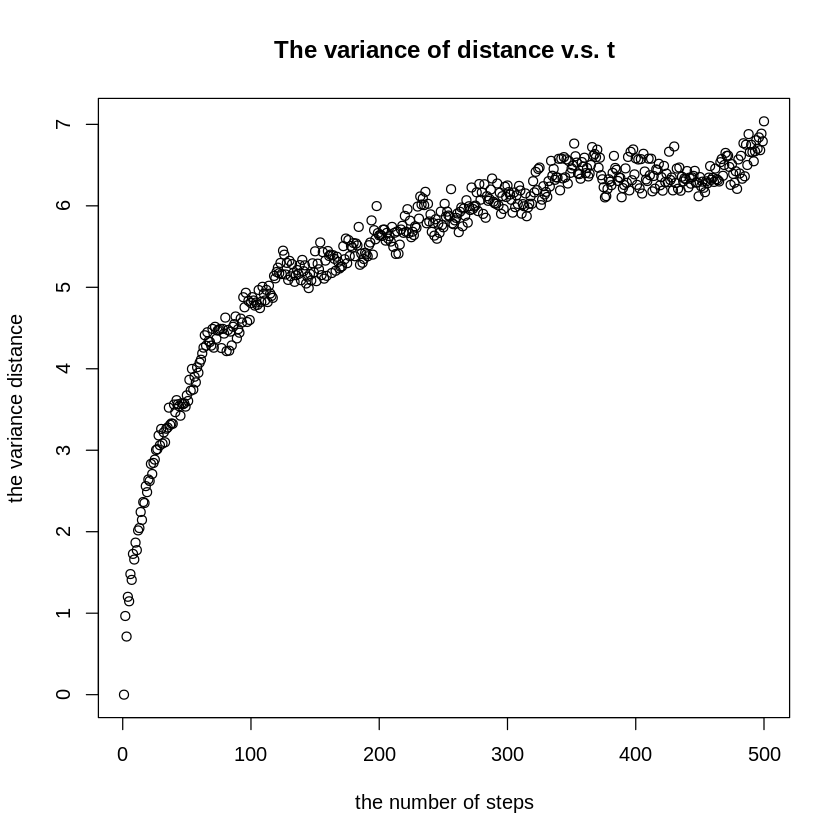

In [79]:
# n=90, m=1
n2 <- 90
set.seed(0)
g2 <- barabasi.game(n=n2, m=1, directed = F)
plot(g2, vertex.size=3, vertex.label=NA, main="Undirected preferential attachment
network with (n=90,m=1)")

last_degree_g2 = plot_meanvar_distance(g2,500,1000)

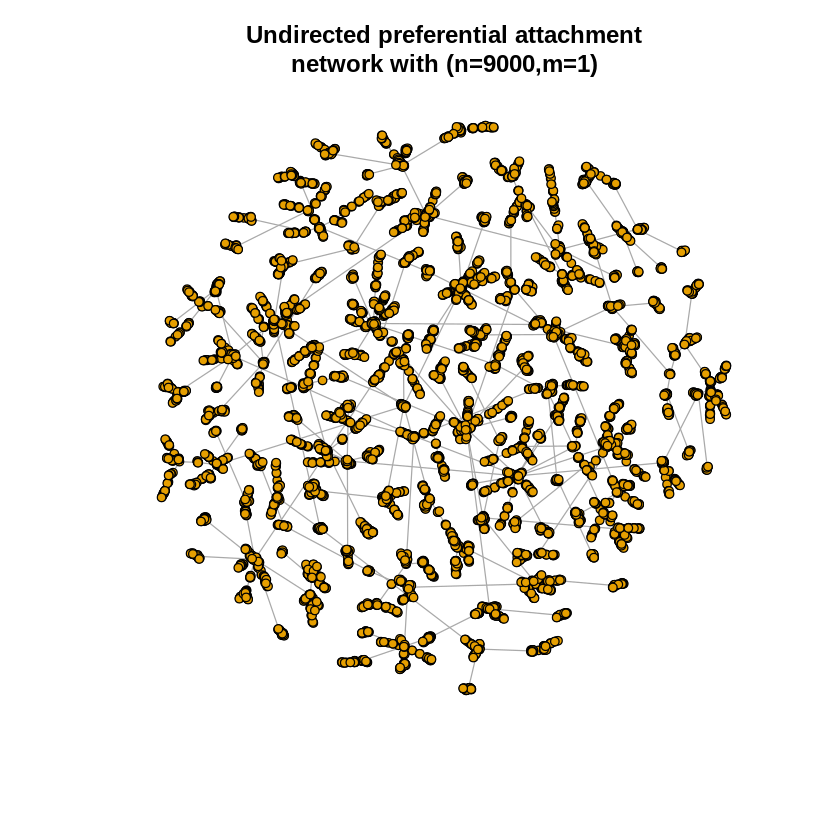

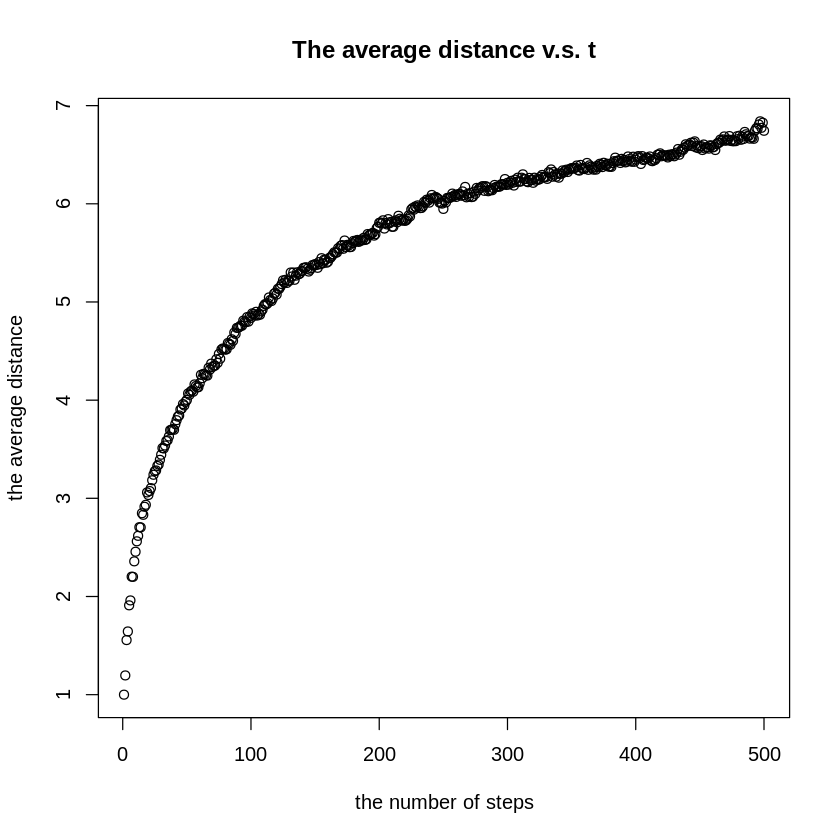

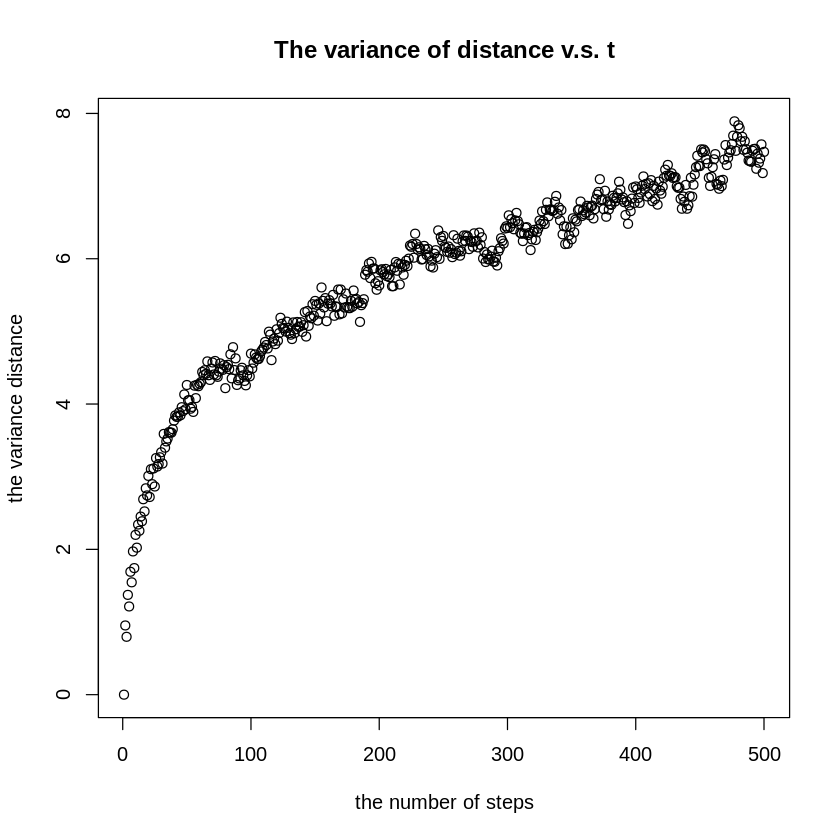

In [82]:
# n=9000, m=1
n3 <- 9000
set.seed(0)
g3 <- barabasi.game(n=n3, m=1, directed = F)
plot(g3, vertex.size=3, vertex.label=NA, main="Undirected preferential attachment
network with (n=9000,m=1)")

last_degree_g3 = plot_meanvar_distance(g3,500,1000)

In [25]:
diameter(g2)
diameter(g3)

[1] 13

[1] 29